In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('path.csv')

df['part'] = df[' distance / mm'].diff()
df.loc[0,'part'] = df.loc[0, ' distance / mm']

df['Δx'] = df['part'] * np.cos(df[' angle / °'] * np.pi/180)
df['Δy'] = df['part'] * np.sin(df[' angle / °'] * np.pi/180)

df['x'] = df['Δx'].cumsum()
df['y'] = df['Δy'].cumsum()

df

,time / s,distance / mm,angle / °,part,Δx,Δy,x,y
0,10.937,741,0,741.0,741.000000,0.000000,741.000000,0.000000
1,29.738,2010,157,1269.0,-1168.120659,495.837802,-427.120659,495.837802
2,39.206,2396,263,386.0,-47.041567,-383.122815,-474.162226,112.714988
3,45.006,2475,316,79.0,56.827844,-54.878011,-417.334381,57.836976
4,47.820,2425,363,-50.0,-49.931477,-2.616798,-467.265858,55.220178
5,55.587,2586,524,161.0,-154.763133,44.377614,-622.028991,99.597793


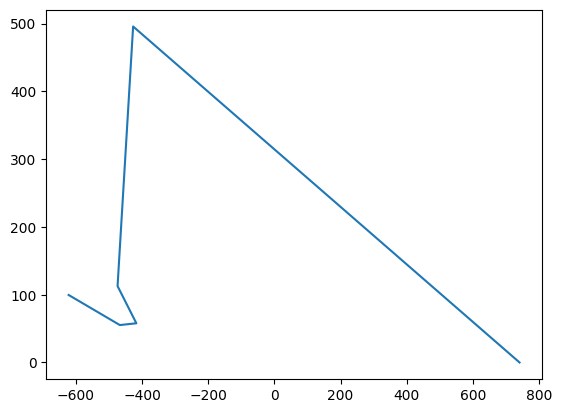

In [22]:
plt.plot(df['x'],df['y'])